## Learning what's on the PIVlab output file

In [218]:
import cmocean as cmo
import matplotlib.pyplot as plt
%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import scipy.io as sio

In [ ]:
def rotate(x_comp, y_comp, angle):
    '''Input:
        x_comp:: x component of vector
        y_comp:: y component of vector
       angle:: in radians.
       Returns:
       Rotated componets of vector x_rot and y_rot'''
    x_rot = x_comp*np.cos(angle)-(y_comp)*np.sin(angle)
    y_rot = x_comp*np.sin(angle)+(y_comp)*np.cos(angle)
    return(x_rot, y_rot)

def get_field(varname, filepath):
    '''
    file:: str, path to file
    name:: str, variable name (eg 'typevector_filtered', 'velocity_magnitude', 'x','y','u_filtered', 'v_filtered', etc.)
    '''
    mat = sio.loadmat(filepath, squeeze_me=True)
    var = mat[varname]
    return(var)

def get_mask(file, fr=0):
    '''Get the mask from a PIV mat file.'''
    mat = sio.loadmat(filepath, squeeze_me=True)
    mask_PIV = np.ma.masked_values(mat['typevector_filtered'][0],0)
    mask = np.ma.getmask(mask_PIV)
    return(mask)

def get_insert_bathy(angle, H = 0.092):
    ''' Get the bathymetry of the canyon insert and x,y coordinates rotated by an angle
    
    INPUT
    angle:: float, angle in radians, positive angle rotates counterclockwise
    H:: float, max depth of water column in meters
    
    RETURNS
    xIns_rot, yIns_rot, x and y coordinates rotated by angle (2D arrays)
    depth_ins, 2D array with depth values'''
    
    insert_file = '/ocean/kramosmu/Building_canyon/BuildCanyon/Bathymetry/tank/BathyInsert03.nc'
    H = 0.092 # m, max water level

    with Dataset(insert_file, 'r') as nbl:
        Xins = nbl.variables['X'][:]
        Yins = nbl.variables['Y'][:]
        depth_ins = (nbl.variables['Bathymetry'][:])-H

    xIns_rot = Xins*np.cos(alpha)-(Yins)*np.sin(alpha)
    yIns_rot = Xins*np.sin(alpha)+(Yins)*np.cos(alpha)
    return(xIns_rot, yIns_rot, depth_ins)
   

In [278]:
filepath = '../exp_01aug19/frames/run03/T01_run03_PIV.mat'
mat = sio.loadmat(filepath, squeeze_me=True)

The file only saves things calculated in the "derived quantities" step. In this case that is only 

'The variables contain all data that was calculated in the PIVlab GUI.',

'If some data was not calculated, the corresponding cell is empty.',

'Typevector is 0 for masked vector, 1 for regular vector, 2 for filtered vector',

'u_original and v_original are the unmodified velocities from the cross-correlation.',

'u_filtered and v_filtered is the above incl. your data validation selection.',

'u_smoothed and v_smoothed is the above incl. your smoothing selection.'

In [281]:
#mat

In [285]:
print(np.shape(mat['typevector_filtered'][1]))
print(np.shape(mat['typevector_filtered']))

(51, 59)
(602,)


In [312]:
fr = 100
mask_PIV = np.ma.masked_values(mat['typevector_filtered'][fr],0)
mask = np.ma.getmask(mask_PIV)

x = np.ma.masked_array(mat['x'][fr],mask=mask)
y = -np.ma.masked_array(mat['y'][fr],mask=mask)
spd = np.ma.masked_array(mat['velocity_magnitude'][fr],mask=mask)
u = np.ma.masked_array(mat['u_filtered'][fr],mask=mask)
v = -np.ma.masked_array(mat['v_filtered'][fr],mask=mask)

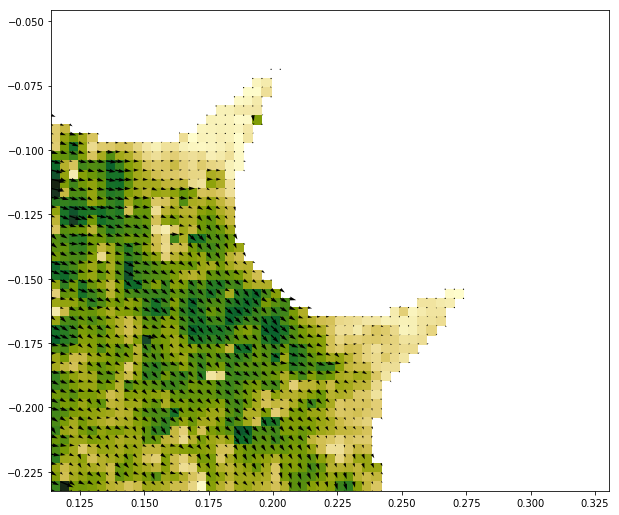

In [313]:
fig,ax = plt.subplots(1, 1, figsize=(10,11))

ax.pcolor(x,y,spd, cmap=cmo.cm.speed) # pcolormesh does not work with masked arrays
ax.quiver(x,y,u,v, color='k')
ax.set_aspect(1)

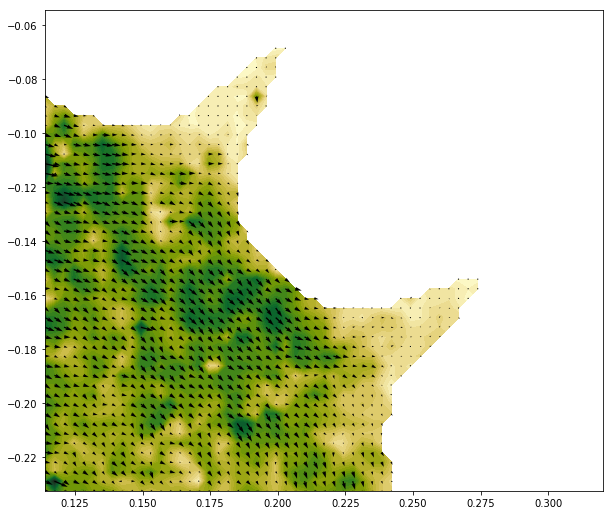

In [314]:
fig,ax = plt.subplots(1, 1, figsize=(10,11))

ax.contourf(x,y,spd,30, cmap=cmo.cm.speed) # pcolormesh does not work with masked arrays
ax.quiver(x,y,u,v, color='k')
ax.set_aspect(1)

In [315]:
alpha = 50*np.pi/180
x_rot = x*np.cos(alpha)-(y)*np.sin(alpha)
y_rot = x*np.sin(alpha)+(y)*np.cos(alpha)
u_rot = u*np.cos(alpha)-(v)*np.sin(alpha)
v_rot = u*np.sin(alpha)+(v)*np.cos(alpha)

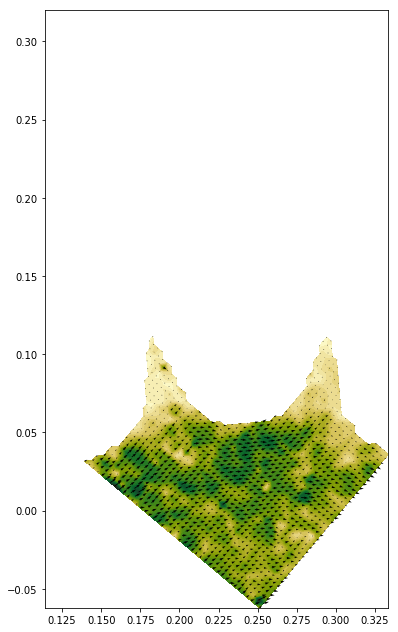

In [316]:
fig,ax = plt.subplots(1, 1, figsize=(10,11))

ax.contourf(x_rot,y_rot,spd,30, cmap=cmo.cm.speed) # pcolormesh does not work with masked arrays
ax.quiver(x_rot,y_rot,u_rot,v_rot, color='k')
ax.set_aspect(1)
#ax.set_ylim(-0.2,0.2)
#ax.set_xlim(-0.2, 0.2)

In [317]:
insert_file = '/ocean/kramosmu/Building_canyon/BuildCanyon/Bathymetry/tank/BathyInsert03.nc'
spacing_file = '/ocean/kramosmu/Building_canyon/BuildCanyon/Bathymetry/tank/BathySpacing01.nc'
H = 0.092 # m, max water level

with Dataset(insert_file, 'r') as nbl:
    Xins = nbl.variables['X'][:]
    Yins = nbl.variables['Y'][:]
    depth_ins = (nbl.variables['Bathymetry'][:])-H

alpha = 71*np.pi/180
alpha2 = 92.4*np.pi/180
xIns_rot = Xins*np.cos(alpha)-(Yins)*np.sin(alpha)
yIns_rot = Xins*np.sin(alpha)+(Yins)*np.cos(alpha)
xIns2_rot = Xins*np.cos(alpha2)-(Yins)*np.sin(alpha2)
yIns2_rot = Xins*np.sin(alpha2)+(Yins)*np.cos(alpha2)


(0.14, 0.32)

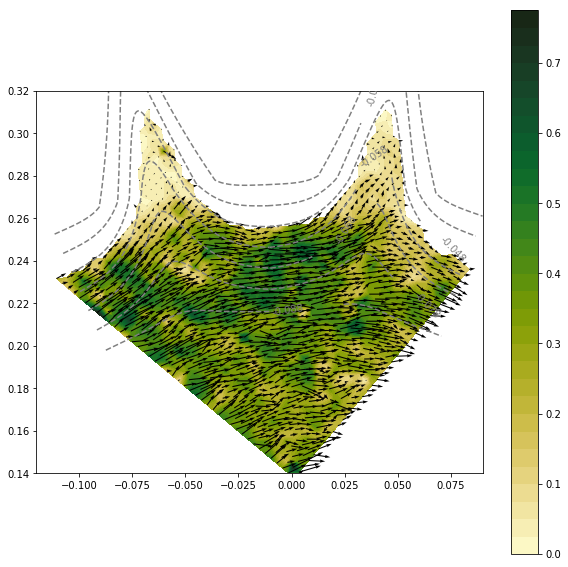

In [319]:
fig,ax = plt.subplots(1, 1, figsize=(10,10))

cf = ax.contourf(x_rot-0.25,y_rot+0.2,spd*100,30, cmap=cmo.cm.speed) # pcolormesh does not work with masked arrays
plt.colorbar(cf)
ax.quiver(x_rot[::1]-0.25,y_rot[::1]+0.2,u_rot[::1],v_rot[::1],scale=0.1, color='k')
ax.set_aspect(1)
cnt = ax.contour(xIns_rot,yIns_rot,depth_ins,levels=[-0.088,-0.078,-0.068,-0.058, -0.048, -0.038, -0.028, -0.018, -0.014], colors='0.5')
cnt2 = ax.contour(xIns2_rot,yIns2_rot,depth_ins,10,levels=[-0.088,-0.078,-0.068,-0.058, -0.048, -0.038, -0.028, -0.018, -0.014], colors='0.5')
plt.clabel(cnt)
ax.set_xlim(-0.12,0.09)
ax.set_ylim(0.14,0.32)